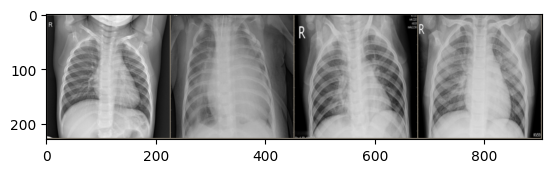

NORMAL PNEUMONIA PNEUMONIA PNEUMONIA
Number of Pneumonia images in training set: 3489
Number of Normal images in training set: 1208


In [3]:

# Import necessary libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Define transformations for training, validation, and testing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Loading the dataset
full_dataset = datasets.ImageFolder(root='/home/user/persistent/chest_xray/chest_xray/train', transform=transform)

# Visualize some training images
def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)  # Unnormalize
    img = torch.clamp(img, 0, 1)  # Clip the values to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(DataLoader(full_dataset, batch_size=4, shuffle=True))
images, labels = next(dataiter)

# Show images
imshow(utils.make_grid(images))

# Print labels
print(' '.join(full_dataset.classes[label] for label in labels))

# Count the number of Pneumonia and Normal images in the training set
pneumonia_count = len([f for f in os.listdir('/home/user/persistent/chest_xray/chest_xray/train/PNEUMONIA') if os.path.isfile(os.path.join('/home/user/persistent/chest_xray/chest_xray/train/PNEUMONIA', f))])
normal_count = len([f for f in os.listdir('/home/user/persistent/chest_xray/chest_xray/train/NORMAL') if os.path.isfile(os.path.join('/home/user/persistent/chest_xray/chest_xray/train/NORMAL', f))])

print(f'Number of Pneumonia images in training set: {pneumonia_count}')
print(f'Number of Normal images in training set: {normal_count}')




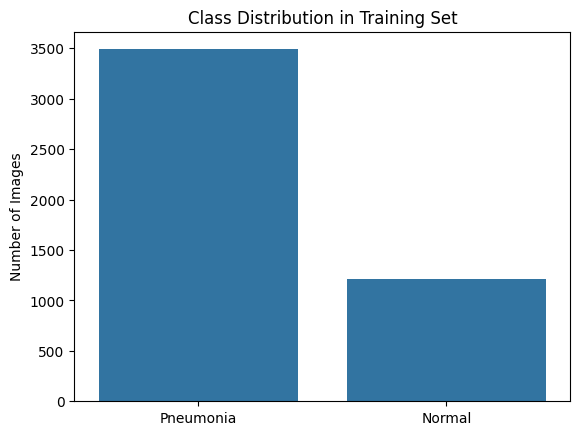

In [4]:
# Class distribution visualization
sns.barplot(x=['Pneumonia', 'Normal'], y=[pneumonia_count, normal_count])
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Images')
plt.show()



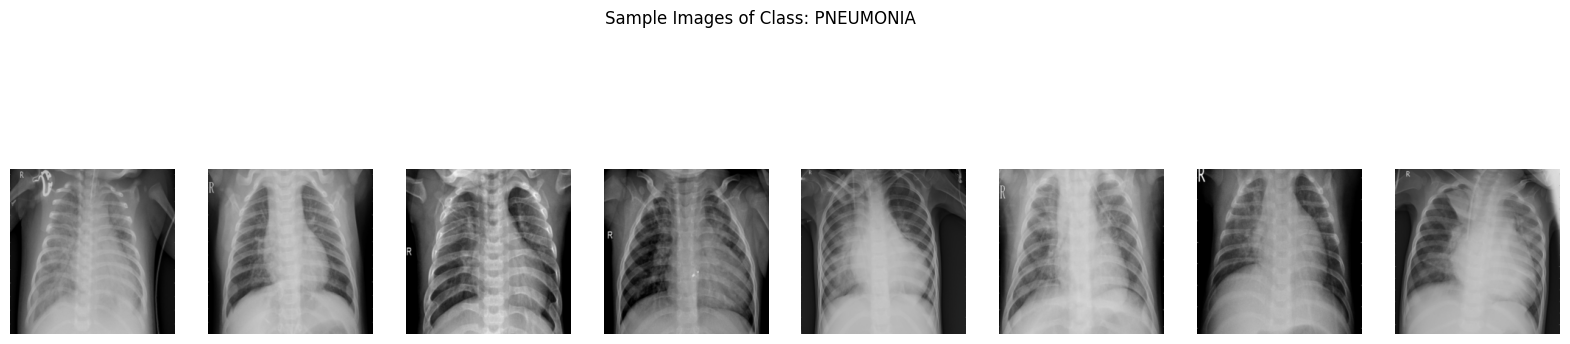

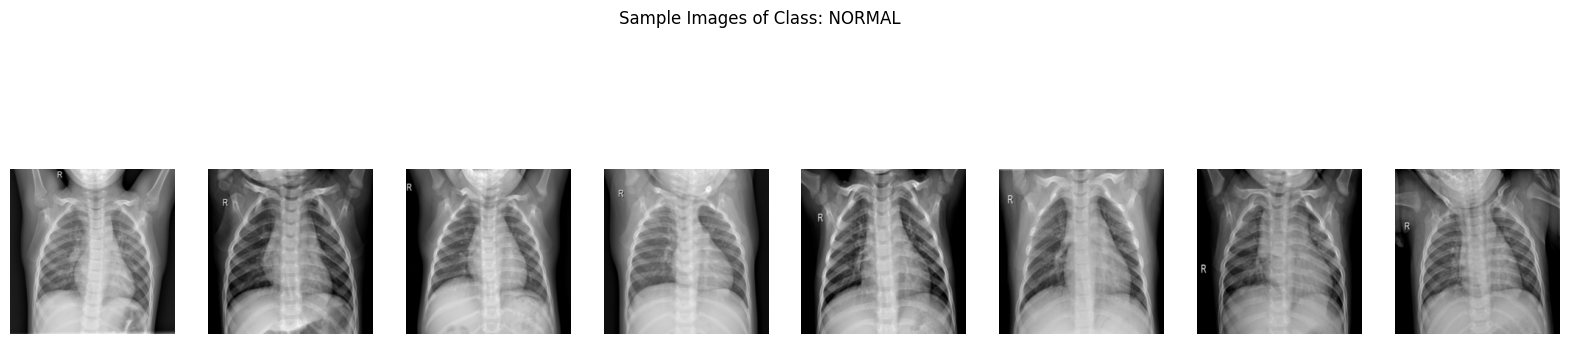

In [8]:
def show_class_images(dataset, class_name, num_images=8):
    class_idx = dataset.class_to_idx[class_name]
    class_images = [img for img, label in dataset if label == class_idx][:num_images]

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i, img in enumerate(class_images):
        # Unnormalize the tensor image
        img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)
        axes[i].imshow(np.transpose(img.numpy(), (1, 2, 0)))
        axes[i].axis('off')
    plt.suptitle(f'Sample Images of Class: {class_name}')
    plt.show()

# Show sample images of each class
show_class_images(full_dataset, 'PNEUMONIA')
show_class_images(full_dataset, 'NORMAL')
